# To do 

1. Split the plot in 4 ranges ([-1, -0.5], [-0.5, 0], [0, 0.5], [0.5, 1.0], [1, ...])
2. PLot the average column densitty distribution and normarlize it. 
3. Repeat all this for M=1^11

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/lib/pymodules/python2.7/matplotlib/__init__.py:758: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now '/home/ngaravito/.config'/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())


In [16]:
data3 = np.loadtxt('dout10001000.txt')

ids = data3[:,0]
d3 = data3[:,1] # Environment 
NHT = data3[:,2]
NHI = data3[:,3] 

In [20]:
index1 = where((~np.isnan(NHI)) & (d3>-1) & (d3<-0.5))
NHT1 = NHT[index1]
NHI1 = NHI[index1]
d31 = d3[index1]

index2 = where((~np.isnan(NHI)) & (d3>-0.5) & (d3<0))
NHT2 = NHT[index2]
NHI2 = NHI[index2]
d32 = d3[index2]

index3 = where((~np.isnan(NHI)) & (d3>0) & (d3<0.5))
NHT3 = NHT[index3]
NHI3 = NHI[index3]
d33 = d3[index3]

index4 = where((~np.isnan(NHI)) & (d3>0.5))
NHT4 = NHT[index4]
NHI4 = NHI[index4]
d34 = d3[index4]

In [81]:
NHI1mean = []
NHT1mean = []
d31mean = []

NHI2mean = []
NHT2mean = []
d32mean = []

NHI3mean = []
NHT3mean = []
d33mean = []

NHI4mean = []
NHT4mean = []
d34mean = []

In [82]:
for i in d31:
    index = where(i==d31)
    NHI_ = NHI1[index]
    NHT_ = NHT1[index]
    NHmean = average(NHI_)
    NHTmean = average(NHT_)
    NHI1mean.append(NHmean)
    NHT1mean.append(NHTmean)
    d31mean.append(i)

for i in d32:
    index = where(i==d32)
    NHI_ = NHI2[index]
    NHT_ = NHT2[index]
    NHmean = average(NHI_)
    NHTmean = average(NHT_)
    NHI2mean.append(NHmean)
    NHT2mean.append(NHTmean)
    d32mean.append(i)
    
for i in d33:
    index = where(i==d33)
    NHI_ = NHI3[index]
    NHT_ = NHT3[index]
    NHmean = average(NHI_)
    NHTmean = average(NHT_)
    NHI3mean.append(NHmean)
    NHT3mean.append(NHTmean)
    d33mean.append(i)

for i in d34:
    index = where(i==d34)
    NHI_ = NHI4[index]
    NHT_ = NHT4[index]
    NHmean = average(NHI_)
    NHTmean = average(NHT_)
    NHI4mean.append(NHmean)
    NHT4mean.append(NHTmean)
    d34mean.append(i)

In [85]:
NHI1mean_c = list(set(NHI1mean))
NHT1mean_c = list(set(NHT1mean))
d31mean_c = list(set(d31mean))

NHI2mean_c = list(set(NHI2mean))
NHT2mean_c = list(set(NHT2mean))
d32mean_c = list(set(d32mean))

NHI3mean_c = list(set(NHI3mean))
NHT3mean_c = list(set(NHT3mean))
d33mean_c = list(set(d33mean))

NHI4mean_c = list(set(NHI4mean))
NHT4mean_c = list(set(NHT4mean))
d34mean_c = list(set(d34mean))

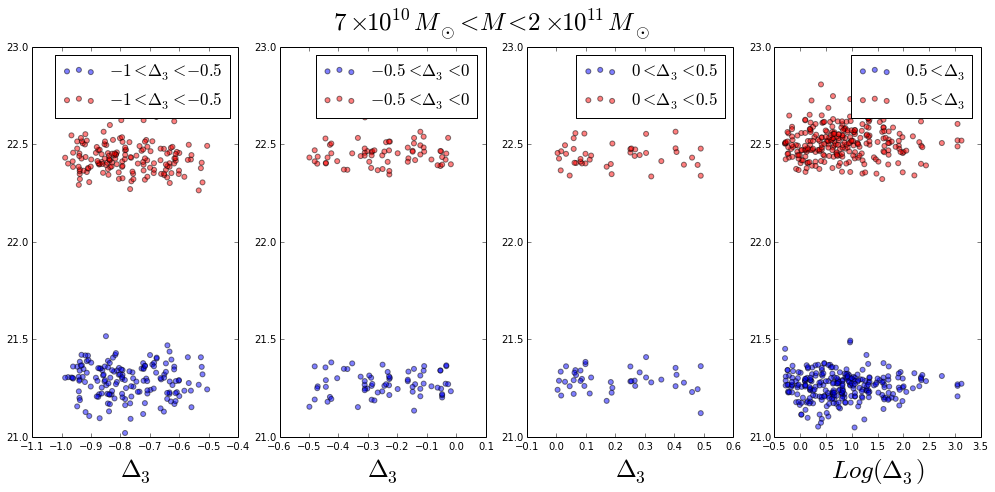

In [112]:
plt.figure(figsize=(17, 7))
plt.suptitle(r'$7 \times 10^{10}M_{\odot} < M <2 \times 10^{11} M_{\odot} $', fontsize=25)
plt.subplot(1, 4, 1)
scatter(d31mean_c, log10(NHI1mean_c), s=25, label='$-1 <\Delta_3 < -0.5$', alpha=0.5)
scatter(d31mean_c, log10(NHT1mean_c), s=25, c='r', label='$-1 <\Delta_3 < -0.5$', alpha=0.5)
plt.xlabel('$\Delta_3$', fontsize=25)
legend(fontsize=17)
ylim(21, 23)
plt.subplot(1, 4, 2)
scatter(d32mean_c, log10(NHI2mean_c), s=25, label='$-0.5 <\Delta_3 < 0$', alpha=0.5)
scatter(d32mean_c, log10(NHT2mean_c), s=25, label='$-0.5 <\Delta_3 < 0$', alpha=0.5, c='r')
plt.xlabel('$\Delta_3$', fontsize=25)
legend(fontsize=17)
ylim(21, 23)
plt.subplot(1, 4, 3)
plt.xlabel('$\Delta_3$', fontsize=25)
scatter(d33mean_c, log10(NHI3mean_c), s=25, label='$0 <\Delta_3 < 0.5$', alpha=0.5)
scatter(d33mean_c, log10(NHT3mean_c), s=25, label='$0 <\Delta_3 < 0.5$', alpha=0.5, c='r')
ylim(21, 23)
legend(fontsize=17)
plt.subplot(1, 4, 4)
scatter(log10(d34mean_c), log10(NHI4mean_c), s=25, label='$0.5 <\Delta_3  $', alpha=0.5)
scatter(log10(d34mean_c), log10(NHT4mean_c), s=25, label='$0.5 <\Delta_3  $', alpha=0.5, c='r')
ylim(21, 23)
plt.xlabel('$Log(\Delta_3)$', fontsize=25)
legend(fontsize=17)
savefig('NHINHTvsD3.png', bbox_inches='tight')

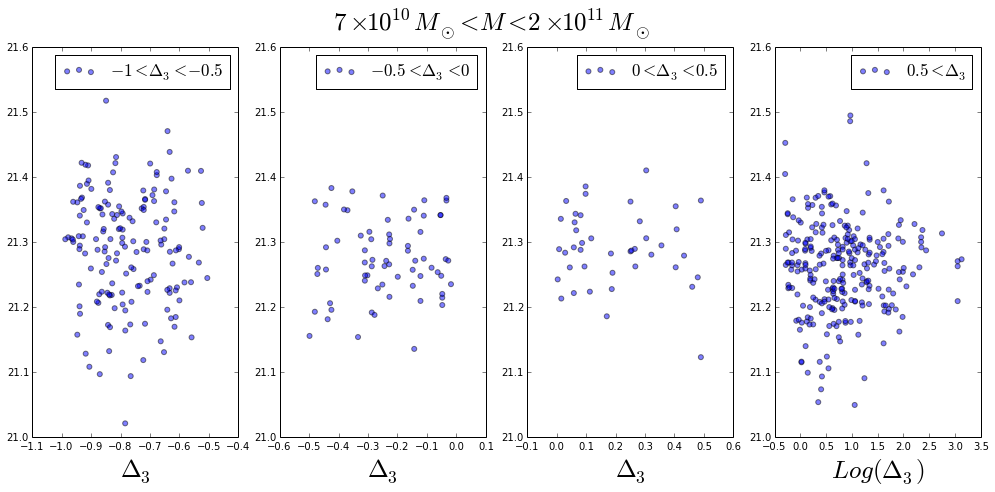

In [113]:
plt.figure(figsize=(17, 7))
plt.suptitle(r'$7 \times 10^{10}M_{\odot} < M <2 \times 10^{11} M_{\odot} $', fontsize=25)
plt.subplot(1, 4, 1)
scatter(d31mean_c, log10(NHI1mean_c), s=25, label='$-1 <\Delta_3 < -0.5$', alpha=0.5)
#scatter(d31mean_c, log10(NHT1mean_c), s=25, c='r', label='$-1 <\Delta_3 < -0.5$', alpha=0.5)
plt.xlabel('$\Delta_3$', fontsize=25)
legend(fontsize=17)
ylim(21, 21.6)
plt.subplot(1, 4, 2)
scatter(d32mean_c, log10(NHI2mean_c), s=25, label='$-0.5 <\Delta_3 < 0$', alpha=0.5)
#scatter(d32mean_c, log10(NHT2mean_c), s=25, label='$-0.5 <\Delta_3 < 0$', alpha=0.5, c='r')
plt.xlabel('$\Delta_3$', fontsize=25)
legend(fontsize=17)
ylim(21, 21.6)
plt.subplot(1, 4, 3)
plt.xlabel('$\Delta_3$', fontsize=25)
scatter(d33mean_c, log10(NHI3mean_c), s=25, label='$0 <\Delta_3 < 0.5$', alpha=0.5)
#scatter(d33mean_c, log10(NHT3mean_c), s=25, label='$0 <\Delta_3 < 0.5$', alpha=0.5, c='r')
ylim(21, 21.6)
legend(fontsize=17)
plt.subplot(1, 4, 4)
scatter(log10(d34mean_c), log10(NHI4mean_c), s=25, label='$0.5 <\Delta_3  $', alpha=0.5)
#scatter(log10(d34mean_c), log10(NHT4mean_c), s=25, label='$0.5 <\Delta_3  $', alpha=0.5, c='r')
ylim(21, 21.6)
plt.xlabel('$Log(\Delta_3)$', fontsize=25)
legend(fontsize=17)
savefig('NHIvsD3.png', bbox_inches='tight')

In [110]:
norm1 = []
d3sort = sort()
for i in range(len(d31mean_c)-1):
    area = NHI1mean_c[i] * (d31mean_c[i+1] - d31mean_c[i])
    norm1.append(area)

index_clean = np.where((~np.isnan(NHI)) & (d3<0) )#& (log10(NHI)>21))
index_clean2 = np.where((~np.isnan(NHI)) & (d3>0) )#& (log10(NHI)>21)) 
index_clean3 = np.where((~np.isnan(NHI)) & (d3<1) )#& (log10(NHI)>21))


ids_1 = ids[index_clean]
d3_1 = d3[index_clean]
NHT_1 = NHT[index_clean]
NHI_1 = NHI[index_clean]

ids_2 = ids[index_clean2]
d3_2 = d3[index_clean2]
NHT_2 = NHT[index_clean2]
NHI_2 = NHI[index_clean2]

ids_3 = ids[index_clean3]
d3_3 = d3[index_clean3]
NHT_3 = NHT[index_clean3]
NHI_3 = NHI[index_clean3]


print min(d3_3), mean(d3_3), max(d3_3)

print len(d3_3)
dsort = sort(d3_3)
print dsort[80000]

In [6]:
sort(d3)
d3_list = []
lend3 = []

for i in range(len(d3)):
    if d3[i] not in d3_list:
        index = where(d3 == d3[i])
        d3_list.append(d3[i])
        lend3.append(len(index[0]))

In [7]:
high = where(lend3>600)
print high[0]

[0]


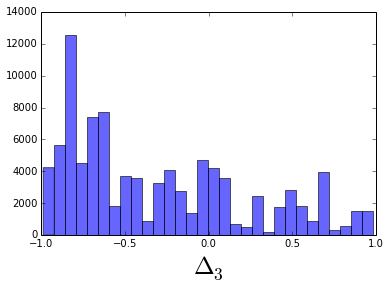

In [8]:
hless1 = hist(d3_3, alpha=0.6, bins=30)
xlabel('$\Delta_3$', fontsize=25)
savefig("Delta3Histogram.png", bbox_inches='tight')

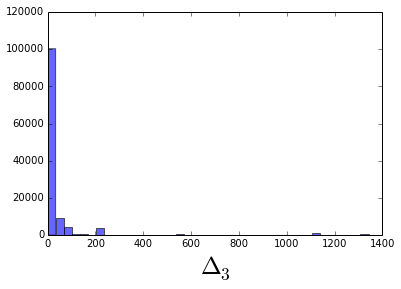

In [9]:
hlarge1 = hist(d3_2, alpha=0.6, bins=40)
xlabel('$\Delta_3$', fontsize=25)
savefig("Delta3HistogramAll.png", bbox_inches='tight')

In [10]:
index_low = where((d3_3 == min(d3_3)) )
ids_low = ids_3[index_low]
d3_low = d3_3[index_low]
NHT_low = NHT_3[index_low]
NHI_low = NHI_3[index_low]

print len(NHI_low)

index_max = where( (d3_3 == max(d3_3)) )# & (log10(NHT)>21))
ids_max = ids_3[index_max]
d3_max = d3_3[index_max]
NHT_max = NHT_3[index_max]
NHI_max = NHI_3[index_max]

print len(NHI_max)

index_mid = where((d3_3 == 0.355963071138))# & (log10(NHT)>21))
ids_mid = ids_3[index_mid]
d3_mid = d3_3[index_mid]
NHT_mid = NHT_3[index_mid]
NHI_mid = NHI_3[index_mid]

print len(NHI_mid)

187
240
204


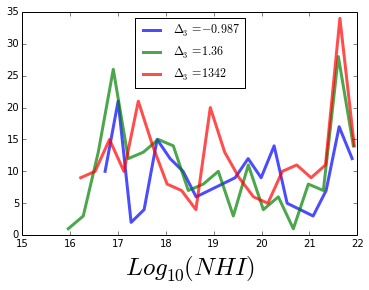

In [11]:
histo1 = histogram(log10(NHI_low), bins=20)
histo2 = histogram(log10(NHI_max), bins=20)
histo3 = histogram(log10(NHI_mid), bins=20)
plot(histo1[1][:-1],histo1[0], lw=3, alpha=0.7, label='$\Delta_3 = -0.987$')
plot(histo3[1][:-1],histo3[0], lw=3, alpha=0.7, label = '$\Delta_3 = 1.36$')
plot(histo2[1][:-1],histo2[0], lw=3, alpha=0.7, label='$\Delta_3 = 1342$')

legend(loc='best')
xlabel('$Log_{10}(NHI)$', fontsize=25)

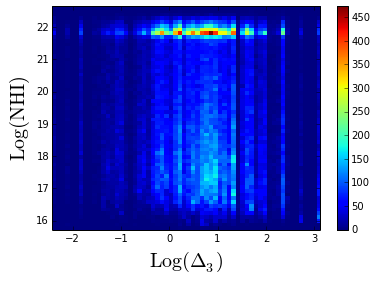

In [12]:
h = hist2d(log10(d3_2), log10(NHI_2), bins=60)
colorbar()
xlabel(r"$\mathrm{Log(\Delta_3)}$", fontsize=20)
ylabel(r"$\mathrm{Log(NHI)}$", fontsize=20)
#h2 = hist2d(d3, log10(NHI), bins=100)
savefig("NHIhistogram.png", bbox_inches='tight')

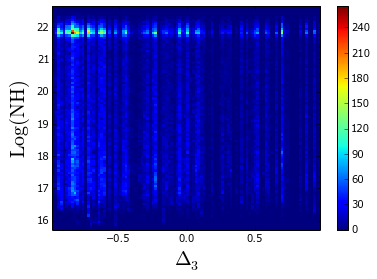

In [105]:
h2 = hist2d(d3_3, log10(NHI_3), bins=100)
colorbar()
xlabel(r"$\mathrm{\Delta_3}$", fontsize=20)
ylabel(r"$\mathrm{Log(NH)}$", fontsize=20)
savefig("NHIall.png", bbox_inches='tight')

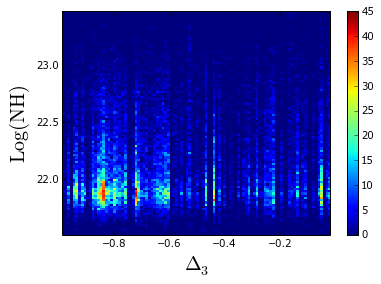

In [44]:
h2 = hist2d(d3_1, log10(NHT_1), bins=100)
colorbar()
xlabel(r"$\mathrm{\Delta_3}$", fontsize=20)
ylabel(r"$\mathrm{Log(NH)}$", fontsize=20)

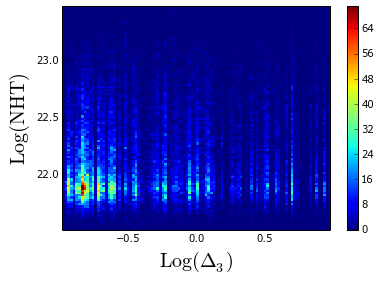

In [45]:
h2 = hist2d(d3_3, log10(NHT_3), bins=100)
colorbar()
xlabel(r"$\mathrm{Log(\Delta_3)}$", fontsize=20)
ylabel(r"$\mathrm{Log(NHT)}$", fontsize=20)
#savefig("NH10000300.png")